the most used function in the kernel functions RBF (radial base function)

In [1]:
# importing requird libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [25]:
# loading datasets
df_red=pd.read_csv(r'C:\Users\yvdha\datascience\linear regression\SVM data\winequality-red.csv',sep=';')
df_wi=pd.read_csv(r'C:\Users\yvdha\datascience\linear regression\SVM data\winequality-white.csv',sep=';')

In [3]:
df_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_wi.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


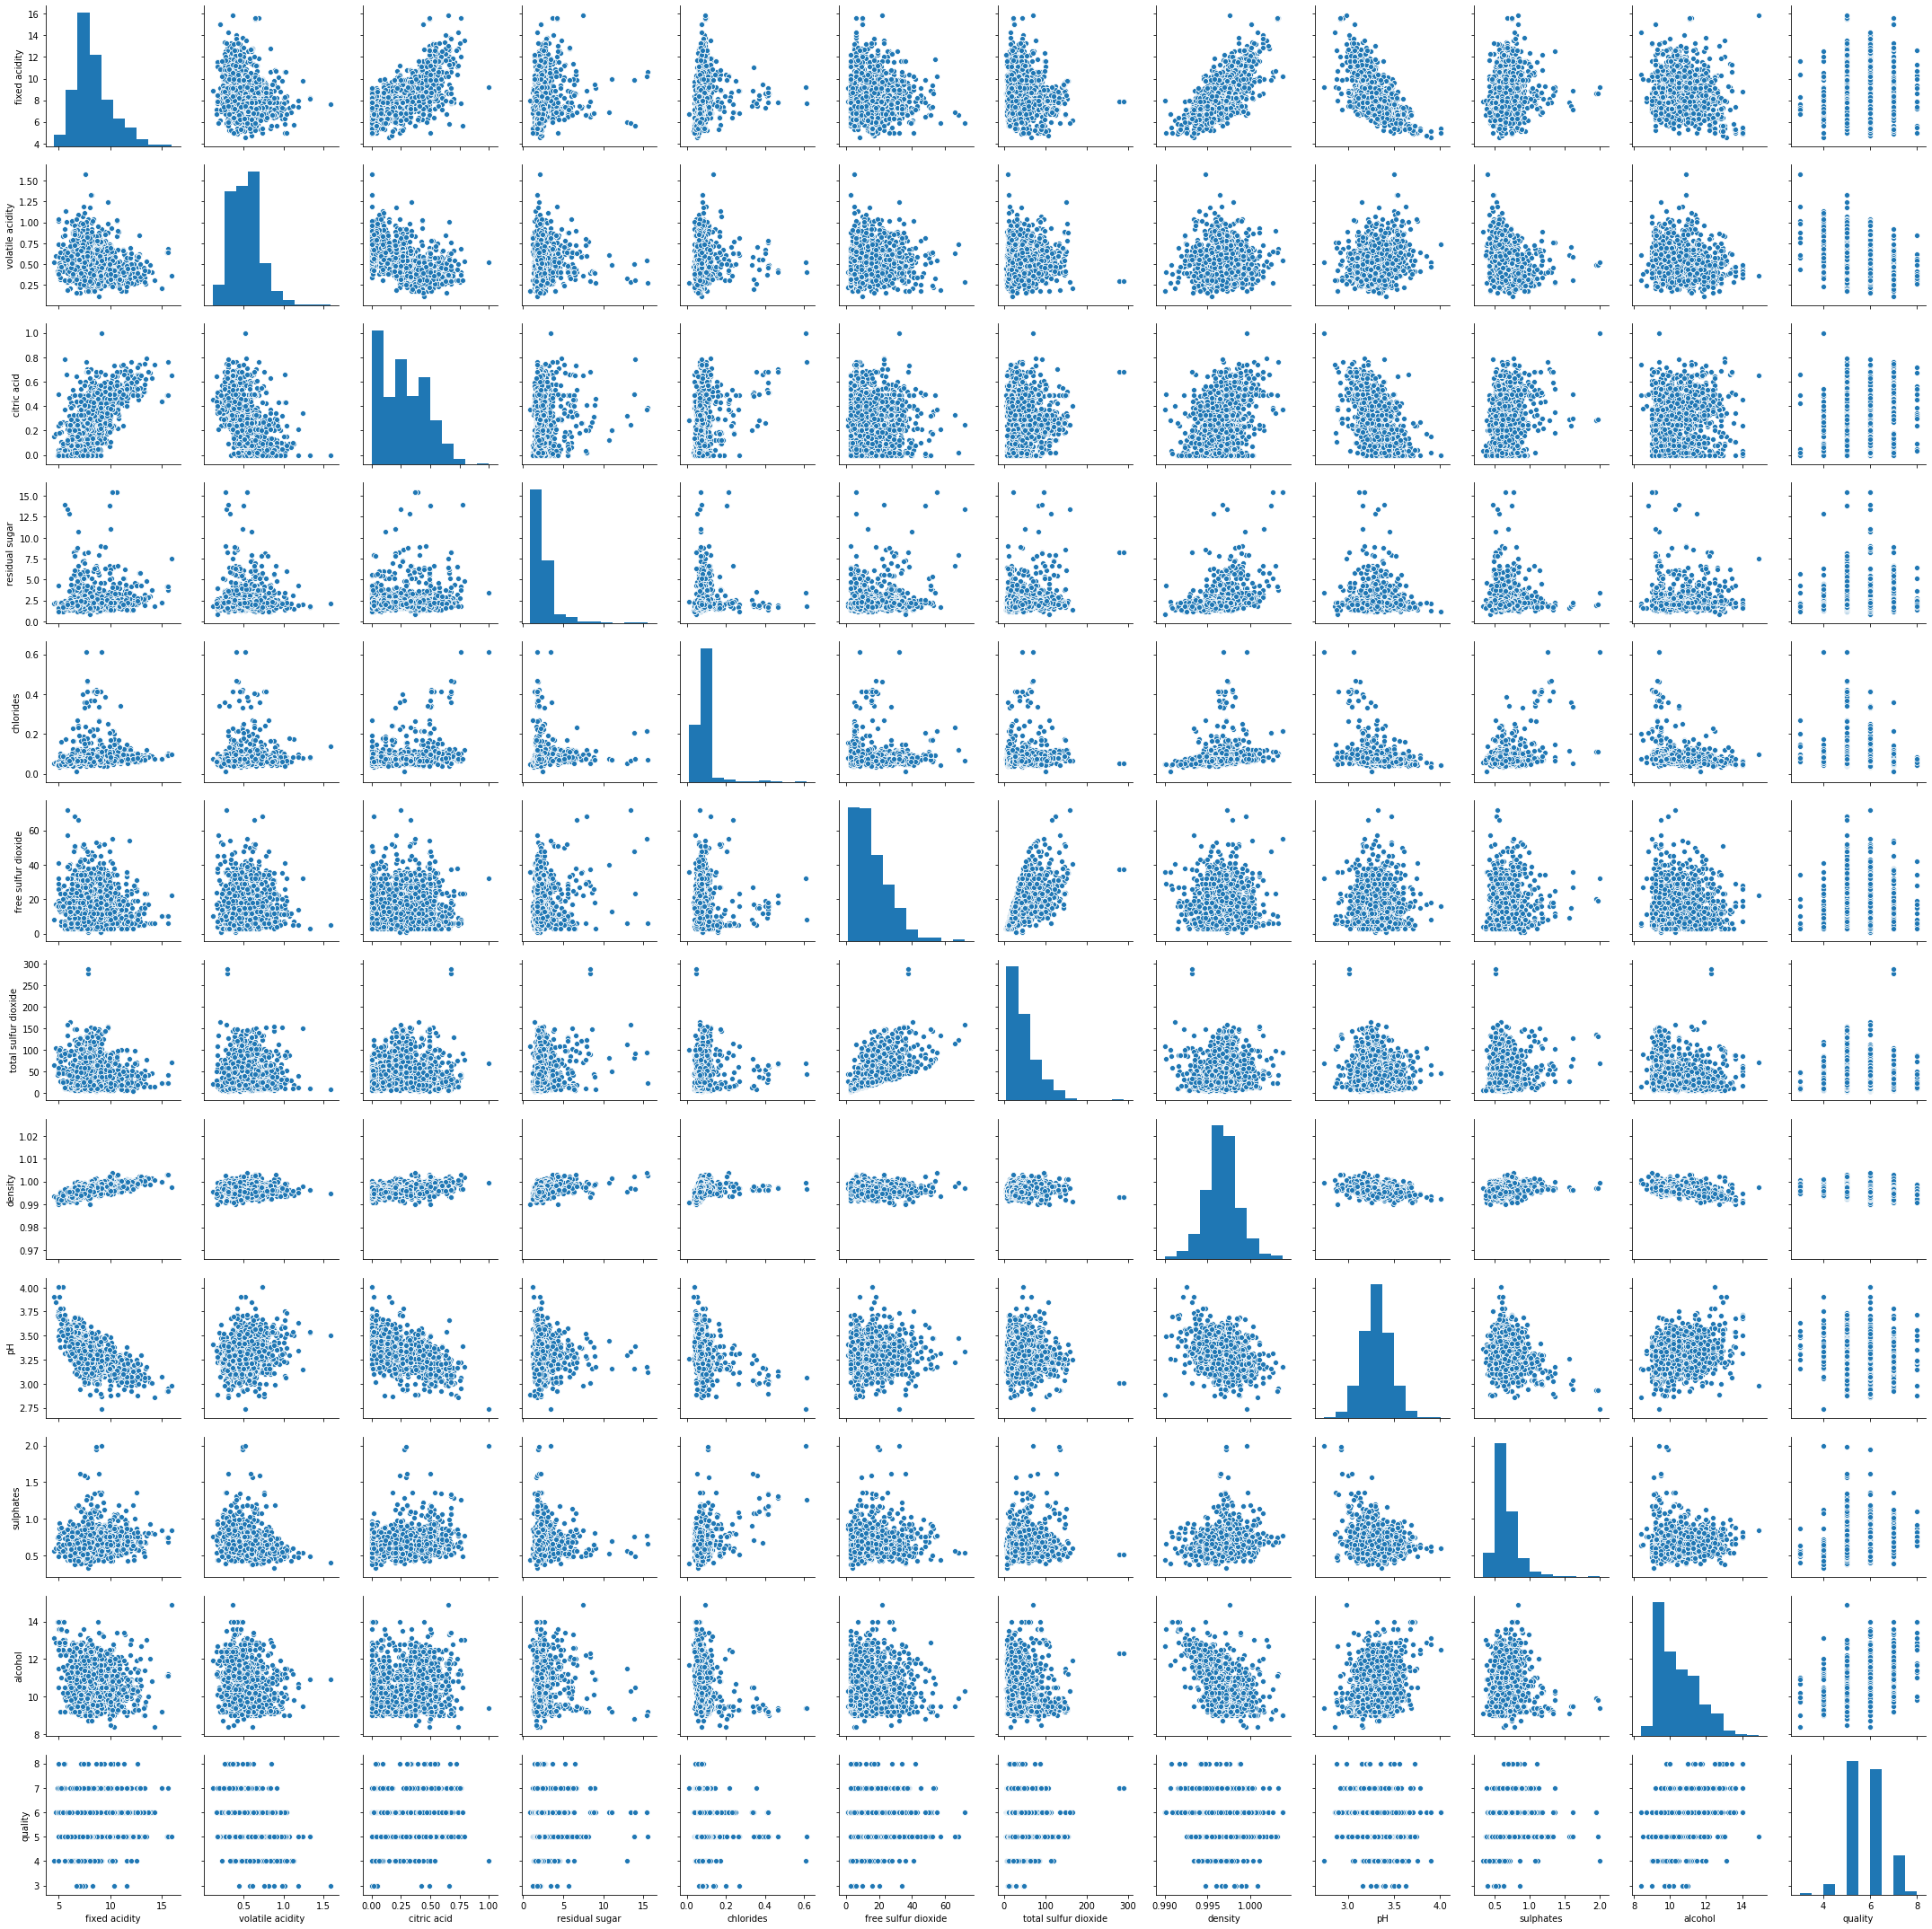

In [5]:
#pair plot for red wine dataset
sns.pairplot(df_red)

In [6]:
# correlation matrix
df_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


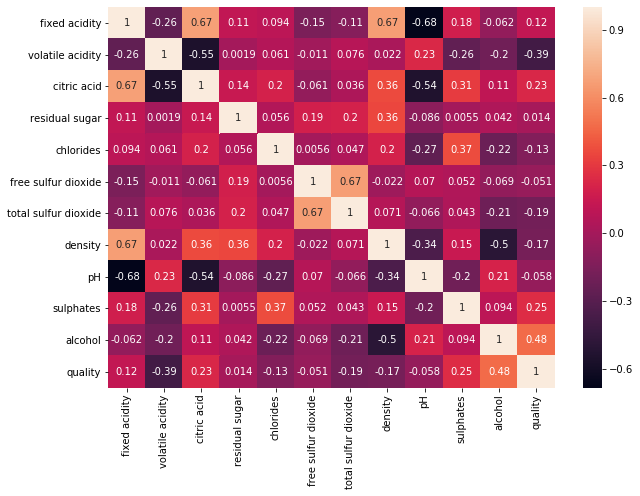

In [7]:
# heat map for correlation matrix
plt.figure(figsize=(10,7))
sns.heatmap(df_red.corr(),annot=True)

In [8]:
# deescription about the white wine dataset
df=df_wi.describe()

In [9]:
df.loc['std']

fixed acidity            0.843868
volatile acidity         0.100795
citric acid              0.121020
residual sugar           5.072058
chlorides                0.021848
free sulfur dioxide     17.007137
total sulfur dioxide    42.498065
density                  0.002991
pH                       0.151001
sulphates                0.114126
alcohol                  1.230621
quality                  0.885639
Name: std, dtype: float64

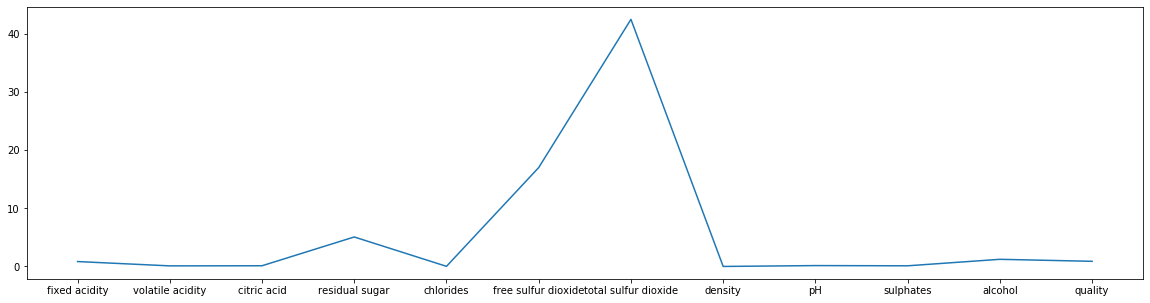

In [10]:
plt.figure(figsize=(20,5))
plt.plot(df.loc['std'])

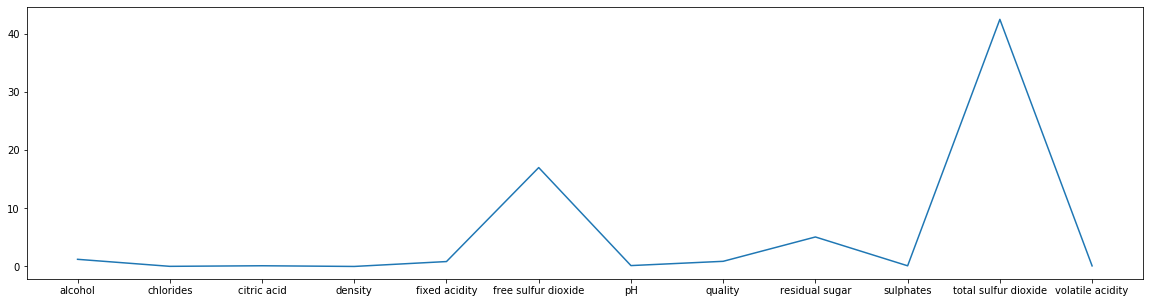

In [11]:
plt.figure(figsize=(20,5))
sns.lineplot(x=df.loc['std'].index,y=df.loc['std'].values)

In [12]:
import missingno as msno

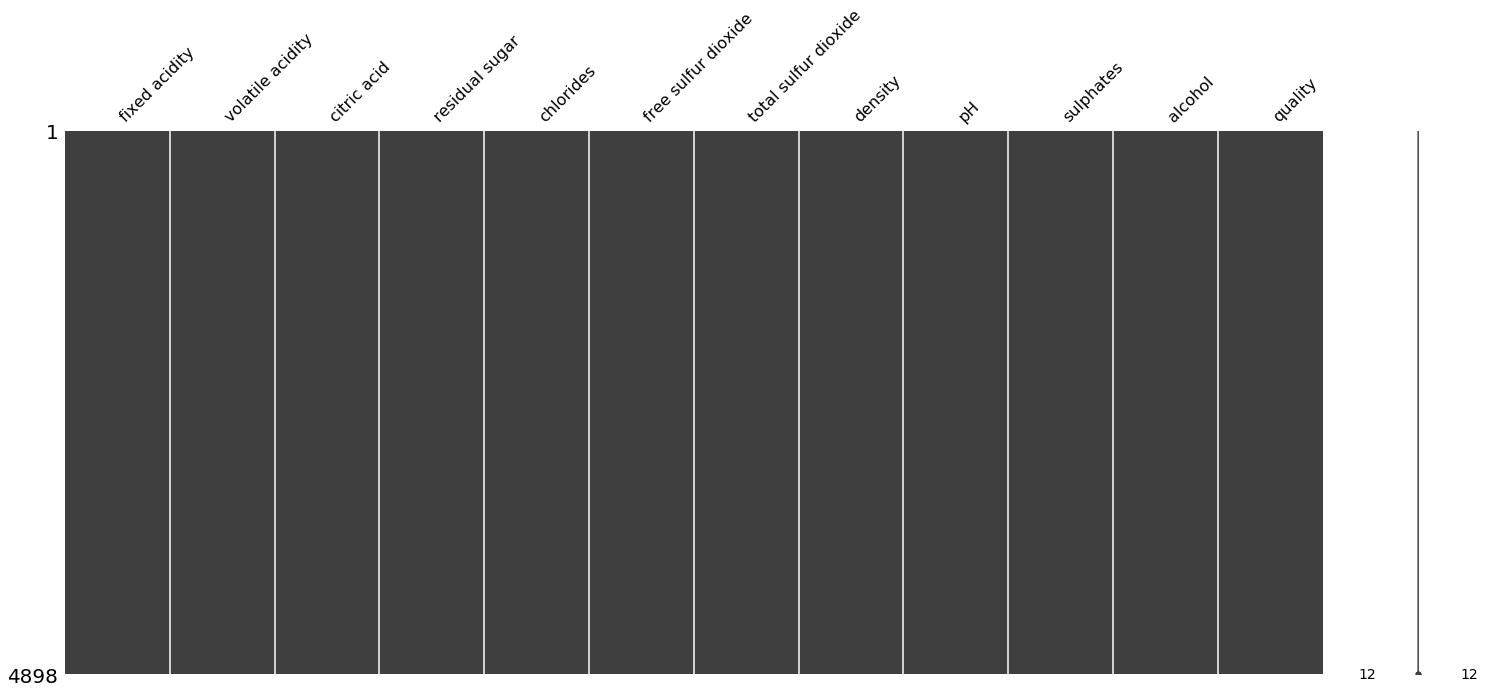

In [13]:
msno.matrix(df_wi)

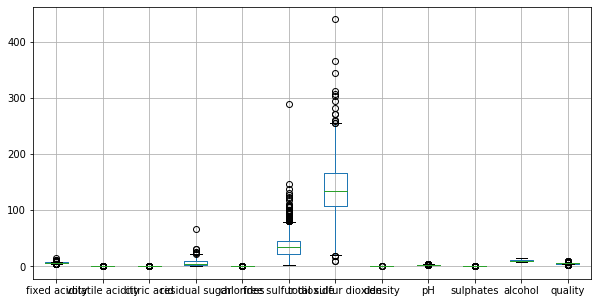

In [14]:
plt.figure(figsize=(10,5))
df_wi.boxplot()

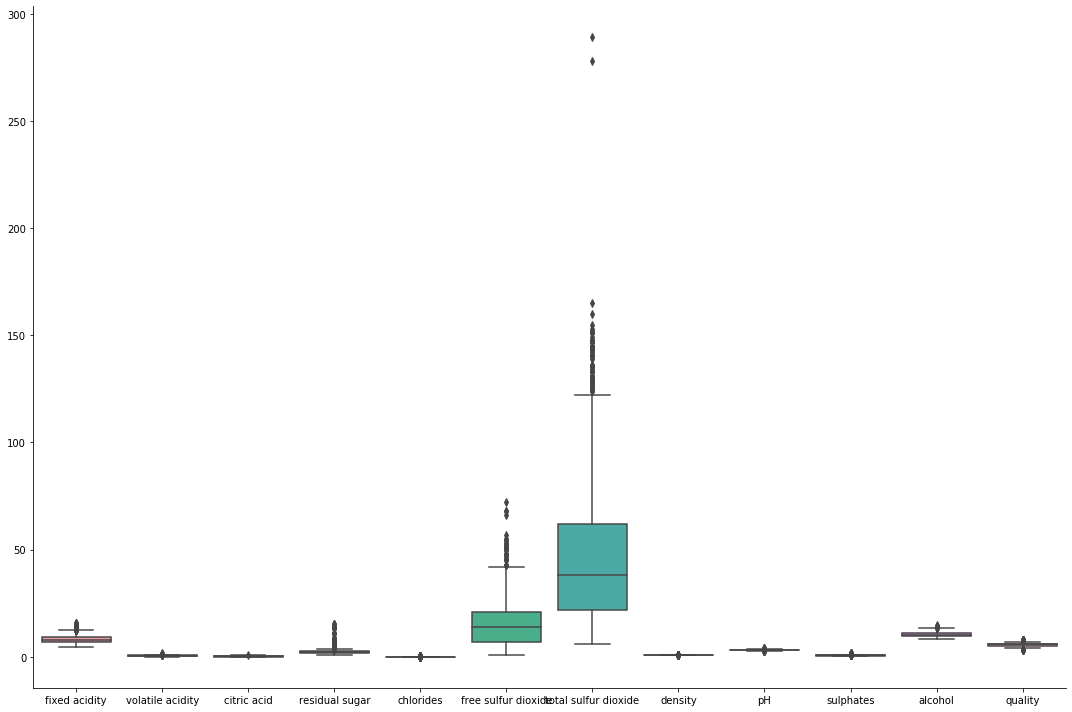

In [15]:
sns.catplot(data=df_red,kind='box',height=10,aspect=1.5)

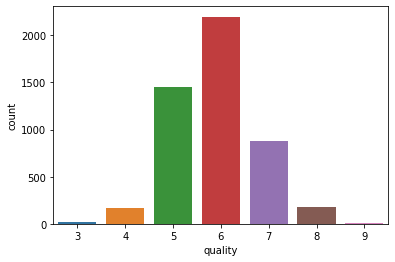

In [16]:
sns.countplot(df_wi.quality)

df_wi['qua']=np.NaN
for i in range(len(df_wi.quality)):
    if(df_wi.quality[i]<4):
        df_wi['qua'][i]=-1
    elif((df_wi.quality[i]>=4) & (df_wi.quality[i]<6)):
        df_wi['qua'][i]=0
    elif(df_wi.quality[i]>6):
        df_wi['qua'][i]=1
    

In [29]:
# making quality vlsues into theree categories
y=df_wi['quality']
def qua(y):
    if y>6:
        return 1
    elif 4<y<=6:
        return 0
    else:
        return -1

In [30]:
df_wi['qua']=y.apply(qua)

In [31]:
df_wi.qua.value_counts()

 0    3655
 1    1060
-1     183
Name: qua, dtype: int64

In [33]:
df_wi.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'qua'],
      dtype='object')

In [35]:
# seperating te dependent and independent coloumns
feu=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
x=df_wi[feu]
y=df_wi['qua']

In [37]:
#scalling the large values
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
scalar=pd.DataFrame(scal.fit_transform(x.values))

In [38]:
# importing the test train split function
from sklearn.model_selection import train_test_split

In [40]:
# dividing data into the test train dataframes
x_train,x_test,y_train,y_test=train_test_split(scalar,y,test_size=0.25,random_state=101)

In [41]:
#importing the model
from sklearn.svm import SVC

In [42]:
model=SVC()
model.fit(x_train,y_train)

G:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
# predicting on the model
pred=model.predict(x_test)

In [44]:
# finding the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7518367346938776

In [45]:
# to find best parameters for the model
from sklearn.model_selection import GridSearchCV

In [51]:
parm={'C':[1,10,100],
      'gamma':[1,10,100],
      'kernel':['linear','rbf']}
model=GridSearchCV(estimator=SVC(),param_grid=parm,scoring='accuracy',cv=10)

In [52]:
st=time.time()
model.fit(x_train,y_train)
ed=time.time()
print(ed-st)

134.75125455856323


In [53]:
# accuracy score of the bestfit model
model.best_score_

0.8265722842363191

In [54]:
#parameters of the best fit model
model.best_params_

{'C': 100, 'gamma': 100, 'kernel': 'rbf'}